In [12]:
import os

In [13]:
path =  '../input/plant-village-color-lite/Plant_leave_diseases_dataset_with_augmentation/'

In [14]:
labels =os.listdir(path)

In [15]:
labels

['Corn___Northern_Leaf_Blight',
 'Tomato___Late_blight',
 'Tomato___healthy',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Background_without_leaves',
 'Potato___healthy',
 'Tomato___Early_blight',
 'Tomato___Septoria_leaf_spot',
 'Corn___healthy',
 'Strawberry___Leaf_scorch',
 'Peach___healthy',
 'Apple___Apple_scab',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Bacterial_spot',
 'Apple___Black_rot',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Peach___Bacterial_spot',
 'Apple___Cedar_apple_rust',
 'Tomato___Target_Spot',
 'Pepper,_bell___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Potato___Late_blight',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Tomato___Tomato_mosaic_virus',
 'Strawberry___healthy',
 'Corn___Common_rust',
 'Apple___healthy',
 'Grape___Black_rot',
 'Potato___Early_blight',
 'Grape___Esca_(Black_Measles)',
 'Raspberry___healthy',
 'Tomato___Leaf_Mold',
 'Cher

In [16]:
d = {}
for x in labels :
    d[x] = len(os.listdir(path+"//"+x))

In [17]:
len(d)

39

In [18]:
d

{'Corn___Northern_Leaf_Blight': 1000,
 'Tomato___Late_blight': 1909,
 'Tomato___healthy': 1591,
 'Grape___healthy': 1000,
 'Orange___Haunglongbing_(Citrus_greening)': 5507,
 'Soybean___healthy': 5090,
 'Squash___Powdery_mildew': 1835,
 'Background_without_leaves': 1143,
 'Potato___healthy': 1000,
 'Tomato___Early_blight': 1000,
 'Tomato___Septoria_leaf_spot': 1771,
 'Corn___healthy': 1162,
 'Strawberry___Leaf_scorch': 1109,
 'Peach___healthy': 1000,
 'Apple___Apple_scab': 1000,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 5357,
 'Tomato___Bacterial_spot': 2127,
 'Apple___Black_rot': 1000,
 'Blueberry___healthy': 1502,
 'Cherry___Powdery_mildew': 1052,
 'Peach___Bacterial_spot': 2297,
 'Apple___Cedar_apple_rust': 1000,
 'Tomato___Target_Spot': 1404,
 'Pepper,_bell___healthy': 1478,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 1076,
 'Potato___Late_blight': 1000,
 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 1000,
 'Tomato___Tomato_mosaic_virus': 1000,
 'Strawberry___healthy': 1000,
 'C

In [ ]:
import numpy as np
import pandas as pd 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [19]:
import matplotlib.pyplot as plt
import random
import os



In [20]:

filenames = os.listdir("../input/plant-village-color-lite/Plant_leave_diseases_dataset_with_augmentation")


In [ ]:
leaf_files = []
leaf_categories = []

In [21]:

for filename in filenames:
    
    filepath  = "../input/plant-village-color-lite/Plant_leave_diseases_dataset_with_augmentation//" + filename
    
    for x in os.listdir(file):
        p = filepath +"//"+ x
        leaf_files.append(p)
        leaf_categories.append(filename)
#         print(filename,p)
    
df = pd.DataFrame({
    'filename': leaf_files,
    'category': leaf_categories
})

In [22]:
df.head()

,filename,category
0,../input/plant-village-color-lite/Plant_leave_...,Corn___Northern_Leaf_Blight
1,../input/plant-village-color-lite/Plant_leave_...,Corn___Northern_Leaf_Blight
2,../input/plant-village-color-lite/Plant_leave_...,Corn___Northern_Leaf_Blight
3,../input/plant-village-color-lite/Plant_leave_...,Corn___Northern_Leaf_Blight
4,../input/plant-village-color-lite/Plant_leave_...,Corn___Northern_Leaf_Blight


In [23]:
IMAGE_SIZE = (224,224)

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Model,Sequential, Input
from tensorflow.keras.models import load_model

In [24]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.applications import DenseNet121

densenet = DenseNet121(weights='imagenet', include_top=False)

inx = Input(shape=(224, 224, 3))

inz = densenet(inz)
inz = GlobalAveragePooling2D()(inz)
inz = BatchNormalization()(inz)
inz = Dropout(0.5)(inz)
inz = Dense(256, activation='relu')(inz)
inz = BatchNormalization()(inz)
inz = Dropout(0.5)(inz)

    # multi output
output = Dense(39,activation = 'softmax', name='root')(inz)
 
model = Model(inx,output)
    
optimizer = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()
    

2021-09-11 15:00:23.926359: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-11 15:00:23.929656: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-11 15:00:23.977021: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-11 15:00:23.977658: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-09-11 15:00:23.977720: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-11 15:00:24.002362: I tensorflow/stream_executor/platform/def

29089792/29084464 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
densenet121 (Functional)     (None, None, None, 1024)  7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
______________________________________________________________

In [25]:
redz = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
check_point1 = ModelCheckpoint('model_2.h5', verbose=1, save_best_only=True)

<AxesSubplot:>

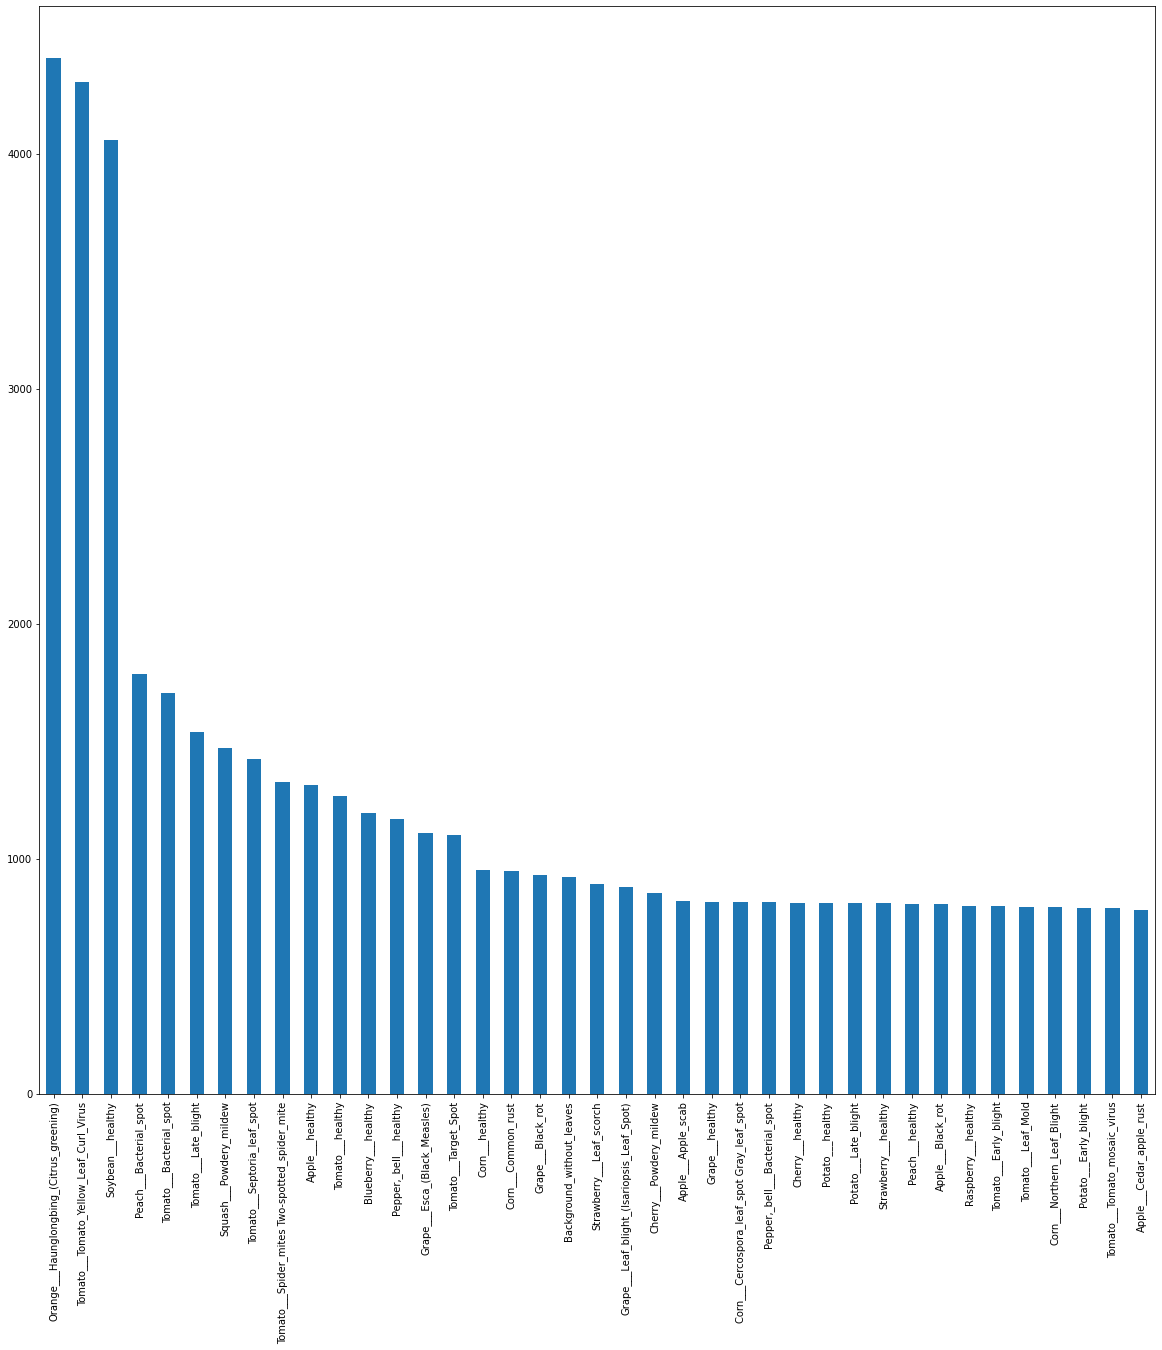

In [26]:
train_z, validate_Z = train_test_split(df, test_size=0.20, random_state=42)
train_z= train_z.reset_index(drop=True)
validate_z = validate_z.reset_index(drop=True)
train_z.head()
plt.figure(figsize = (20,20))
train_z['category'].value_counts().plot.bar()

In [27]:
total_train = train_z.shape[0]
total_validation = validate_z.shape[0]
batch_size = 64

In [28]:
t_datagenerator = ImageDataGenerator(
    
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    validation_split=0.2,
    height_shift_range=0.1
)

t_generator = t_datagenerator.flow_from_dataframe(
    train_z, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)


Found 49188 validated image filenames belonging to 39 classes.


In [29]:
v_datagenerator = ImageDataGenerator(rescale=1/255)

v_generator = v_datagenerator.flow_from_dataframe(
    validate_z, 
    
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
   
)

Found 12298 validated image filenames belonging to 39 classes.


In [30]:
t_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Background_without_leaves': 4,
 'Blueberry___healthy': 5,
 'Cherry___Powdery_mildew': 6,
 'Cherry___healthy': 7,
 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 8,
 'Corn___Common_rust': 9,
 'Corn___Northern_Leaf_Blight': 10,
 'Corn___healthy': 11,
 'Grape___Black_rot': 12,
 'Grape___Esca_(Black_Measles)': 13,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 14,
 'Grape___healthy': 15,
 'Orange___Haunglongbing_(Citrus_greening)': 16,
 'Peach___Bacterial_spot': 17,
 'Peach___healthy': 18,
 'Pepper,_bell___Bacterial_spot': 19,
 'Pepper,_bell___healthy': 20,
 'Potato___Early_blight': 21,
 'Potato___Late_blight': 22,
 'Potato___healthy': 23,
 'Raspberry___healthy': 24,
 'Soybean___healthy': 25,
 'Squash___Powdery_mildew': 26,
 'Strawberry___Leaf_scorch': 27,
 'Strawberry___healthy': 28,
 'Tomato___Bacterial_spot': 29,
 'Tomato___Early_blight': 30,
 'Tomato___Late_blight': 31,
 'Tomato__

In [31]:
epochs=25


modelhistory = model.fit_generator(
    t_generator, 
    epochs=epochs,
    validation_data=v_generator,
    validation_steps=total_validation//batch_size,
    steps_per_epoch=total_train//batch_size,callbacks=[redz, check_point1])
    


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-09-11 15:01:07.280062: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-11 15:01:07.283572: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000165000 Hz


Epoch 1/25


2021-09-11 15:01:17.333177: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-09-11 15:01:18.185574: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-09-11 15:01:18.328316: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


768/768 [==============================] - 890s 1s/step - loss: 1.9876 - accuracy: 0.5384 - val_loss: 0.0911 - val_accuracy: 0.9726

Epoch 00001: val_loss improved from inf to 0.09110, saving model to model_2.h5
Epoch 2/25
768/768 [==============================] - 769s 1s/step - loss: 0.1475 - accuracy: 0.9610 - val_loss: 0.0660 - val_accuracy: 0.9787

Epoch 00002: val_loss improved from 0.09110 to 0.06604, saving model to model_2.h5
Epoch 3/25
768/768 [==============================] - 725s 943ms/step - loss: 0.0830 - accuracy: 0.9778 - val_loss: 0.0414 - val_accuracy: 0.9864

Epoch 00003: val_loss improved from 0.06604 to 0.04140, saving model to model_2.h5
Epoch 4/25
768/768 [==============================] - 722s 940ms/step - loss: 0.0516 - accuracy: 0.9861 - val_loss: 0.0239 - val_accuracy: 0.9924

Epoch 00004: val_loss improved from 0.04140 to 0.02387, saving model to model_2.h5
Epoch 5/25
768/768 [==============================] - 755s 983ms/step - loss: 0.0416 - accuracy: 0.98

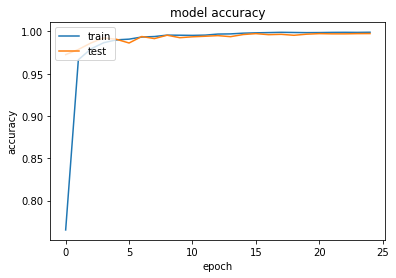

In [32]:
plt.plot(modelhistory.history['accuracy'])
plt.plot(modelhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

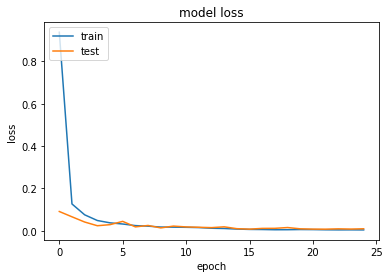

In [33]:
# loss plot
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
model.save_weights("plant(w).h5")
model.save("plant(m).h5")

In [35]:
d = t_generator.class_indices

import cv2
from tqdm import tqdm
from skimage.transform import resize
pred = []
y_true = []
for f in tqdm(range(len(validate_z))) :
#     print(validate["filename"][f])
    x = cv2.imread(validate_z["filename"][f], cv2.IMREAD_COLOR)
    
        
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
#     print(type(x))
#     print(x.shape)
    x = resize(x, IMAGE_SIZE)
#     print(x.shape)
#     print(x)

    x = x.astype(np.float32)
#     print("aaa",x)
#     print(x.shape)
    x = x.reshape((1,224,224,3))

    pred.append(np.argmax(model.predict([x])[0]))
#     print(d[validate["category"][f]])
    y_true.append(d[validate_z["category"][f]])
    

labels = list(t_generator.class_indices.keys())

100%|██████████| 12298/12298 [31:19<00:00,  6.54it/s]


Text(0.5, 255.29374999999993, 'Predicted')

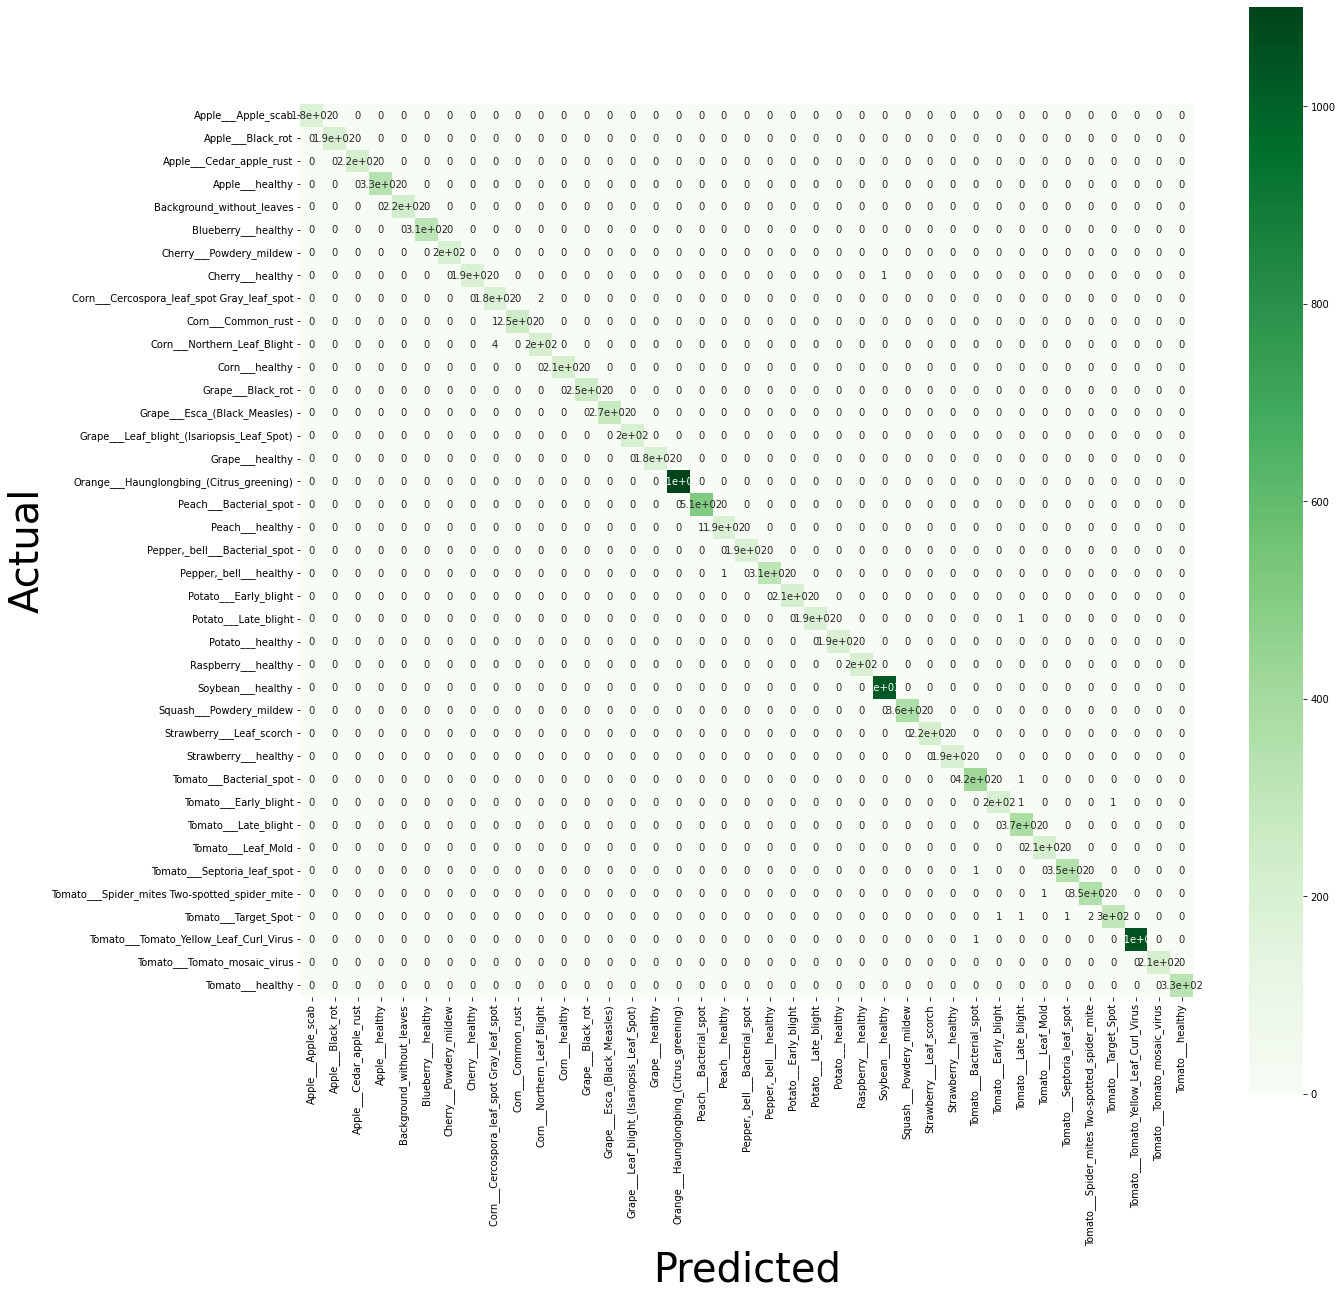

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(20,20))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=labels, yticklabels=labels)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)
